In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pickle

In [2]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Documents\IBM\project_employee\data\survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
print(df.shape)
df['CompTotal'].isnull().sum()

(65437, 114)


np.int64(31697)

In [4]:
df.dropna(axis=0,inplace=True, subset=['CompTotal'])

In [5]:
print(df.shape)
df.head()
# df['CompTotal'].isnull().sum()

(33740, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0


In [6]:
df['Currency'].isnull().sum()
df.loc[df["Currency"] == "none	Faroese krona", "Currency"] = "DKK	Faroese krona"
df['Currency'].value_counts()


Currency
EUR European Euro              9545
USD\tUnited States dollar      8747
GBP\tPound sterling            2023
INR\tIndian rupee              1523
CAD\tCanadian dollar           1265
                               ... 
FKP\tFalkland Islands pound       1
CVE\tCape Verdean escudo          1
SRD\tSurinamese dollar            1
SZL\tSwazi lilangeni              1
AWG\tAruban florin                1
Name: count, Length: 131, dtype: int64

In [7]:
conversion_rates =  {
    "USD": 1,
    "AED": 3.6725,
    "AFN": 69.2232,
    "ALL": 83.7169,
    "AMD": 383.9832,
    "ANG": 1.79,
    "AOA": 919.5642,
    "ARS": 1261.58,
    "AUD": 1.5209,
    "AWG": 1.79,
    "AZN": 1.7002,
    "BAM": 1.6747,
    "BBD": 2,
    "BDT": 121.6245,
    "BGN": 1.6747,
    "BHD": 0.376,
    "BIF": 2984.9462,
    "BMD": 1,
    "BND": 1.2812,
    "BOB": 6.933,
    "BRL": 5.5564,
    "BSD": 1,
    "BTN": 85.9456,
    "BWP": 13.384,
    "BYN": 3.0794,
    "BZD": 2,
    "CAD": 1.369,
    "CDF": 2903.126,
    "CHF": 0.7969,
    "CLP": 954.8084,
    "CNY": 7.1742,
    "COP": 4018.454,
    "CRC": 504.4746,
    "CUP": 24,
    "CVE": 94.4176,
    "CZK": 21.126,
    "DJF": 177.721,
    "DKK": 6.3879,
    "DOP": 60.2652,
    "DZD": 129.7637,
    "EGP": 49.4847,
    "ERN": 15,
    "ETB": 136.3657,
    "EUR": 0.8563,
    "FJD": 2.2436,
    "FKP": 0.7415,
    "FOK": 6.3882,
    "GBP": 0.7416,
    "GEL": 2.7137,
    "GGP": 0.7415,
    "GHS": 10.4773,
    "GIP": 0.7415,
    "GMD": 72.7698,
    "GNF": 8710.2075,
    "GTQ": 7.6828,
    "GYD": 209.1811,
    "HKD": 7.85,
    "HNL": 26.16,
    "HRK": 6.4516,
    "HTG": 131.1604,
    "HUF": 341.9211,
    "IDR": 16238.5564,
    "ILS": 3.3333,
    "IMP": 0.7415,
    "INR": 85.9457,
    "IQD": 1309.904,
    "IRR": 43114.9656,
    "ISK": 121.808,
    "JEP": 0.7415,
    "JMD": 160.1256,
    "JOD": 0.709,
    "JPY": 147.2361,
    "KES": 129.2386,
    "KGS": 87.3186,
    "KHR": 4015.7435,
    "KID": 1.521,
    "KMF": 421.2617,
    "KPW": 900,
    "KRW": 1375.6395,
    "KWD": 0.3054,
    "KYD": 0.8333,
    "KZT": 522.8469,
    "LAK": 21770.3828,
    "LBP": 89500,
    "LKR": 300.6971,
    "LRD": 200.4981,
    "LSL": 17.9251,
    "LYD": 5.3898,
    "MAD": 9.0076,
    "MDL": 16.894,
    "MGA": 4421.262,
    "MKD": 52.755,
    "MMK": 2104.4536,
    "MNT": 3600.3659,
    "MOP": 8.0855,
    "MRU": 39.9125,
    "MUR": 45.3661,
    "MVR": 15.432,
    "MWK": 1736.5584,
    "MXN": 18.6751,
    "MYR": 4.2521,
    "MZN": 63.6336,
    "NAD": 17.9251,
    "NGN": 1527.7765,
    "NIO": 36.8038,
    "NOK": 10.1394,
    "NPR": 137.513,
    "NZD": 1.665,
    "OMR": 0.3845,
    "PAB": 1,
    "PEN": 3.5533,
    "PGK": 4.1355,
    "PHP": 56.5249,
    "PKR": 284.4591,
    "PLN": 3.6452,
    "PYG": 7828.308,
    "QAR": 3.64,
    "RON": 4.3461,
    "RSD": 100.1409,
    "RUB": 77.9843,
    "RWF": 1442.8421,
    "SAR": 3.75,
    "SBD": 8.1424,
    "SCR": 14.4933,
    "SDG": 458.4006,
    "SEK": 9.5668,
    "SGD": 1.2812,
    "SHP": 0.7415,
    "SLE": 22.4531,
    "SLL": 22453.1339,
    "SOS": 571.534,
    "SRD": 37.307,
    "SSP": 4662.4889,
    "STN": 20.9788,
    "SYP": 12753.0751,
    "SZL": 17.9251,
    "THB": 32.4135,
    "TJS": 10.2617,
    "TMT": 3.4997,
    "TND": 2.8999,
    "TOP": 2.3693,
    "TRY": 40.2014,
    "TTD": 6.7681,
    "TVD": 1.521,
    "TWD": 29.0847,
    "TZS": 2606.1504,
    "UAH": 41.793,
    "UGX": 3580.4795,
    "UYU": 40.62,
    "UZS": 12690.9724,
    "VES": 115.3279,
    "VND": 25701.2181,
    "VUV": 118.6241,
    "WST": 2.6057,
    "XAF": 561.6822,
    "XCD": 2.7,
    "XCG": 1.79,
    "XDR": 0.7301,
    "XOF": 561.6822,
    "XPF": 102.1815,
    "YER": 241.5423,
    "ZAR": 17.927,
    "ZMW": 23.4986,
    "ZWL": 26.8394
  }
len(conversion_rates)

164

In [8]:
diff_curr = df['Currency'].unique()
diff_curr = [x[:3] for x in diff_curr]
len(diff_curr)
sorted(diff_curr)

['AED',
 'AFN',
 'ALL',
 'AMD',
 'ANG',
 'AOA',
 'ARS',
 'AUD',
 'AWG',
 'AZN',
 'BAM',
 'BDT',
 'BGN',
 'BHD',
 'BIF',
 'BND',
 'BOB',
 'BRL',
 'BSD',
 'BTN',
 'BWP',
 'BYN',
 'CAD',
 'CHF',
 'CLP',
 'CNY',
 'COP',
 'CRC',
 'CUP',
 'CVE',
 'CZK',
 'DKK',
 'DKK',
 'DOP',
 'DZD',
 'EGP',
 'ETB',
 'EUR',
 'FJD',
 'FKP',
 'GBP',
 'GEL',
 'GGP',
 'GHS',
 'GTQ',
 'GYD',
 'HKD',
 'HNL',
 'HUF',
 'IDR',
 'ILS',
 'IMP',
 'INR',
 'IQD',
 'IRR',
 'ISK',
 'JMD',
 'JOD',
 'JPY',
 'KES',
 'KGS',
 'KHR',
 'KPW',
 'KRW',
 'KWD',
 'KZT',
 'LBP',
 'LKR',
 'LYD',
 'MAD',
 'MDL',
 'MGA',
 'MKD',
 'MMK',
 'MNT',
 'MOP',
 'MRU',
 'MUR',
 'MVR',
 'MWK',
 'MXN',
 'MYR',
 'MZN',
 'NAD',
 'NGN',
 'NIO',
 'NOK',
 'NPR',
 'NZD',
 'OMR',
 'PEN',
 'PHP',
 'PKR',
 'PLN',
 'PYG',
 'QAR',
 'RON',
 'RSD',
 'RUB',
 'RWF',
 'SAR',
 'SEK',
 'SGD',
 'SLL',
 'SOS',
 'SRD',
 'SYP',
 'SZL',
 'THB',
 'TJS',
 'TMT',
 'TND',
 'TRY',
 'TTD',
 'TWD',
 'TZS',
 'UAH',
 'UGX',
 'USD',
 'UYU',
 'UZS',
 'VES',
 'VND',
 'WST',
 'XAF',


In [9]:
missing_keys = [key for key in diff_curr if key not in conversion_rates]
print(f"Missing keys ({len(missing_keys)}): {missing_keys}")


Missing keys (0): []


In [10]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0


In [11]:
df['Country'].unique().tolist()

['Pakistan',
 'Austria',
 'Turkey',
 'France',
 'United States of America',
 'United Kingdom of Great Britain and Northern Ireland',
 'Bulgaria',
 'Greece',
 'Brazil',
 'Germany',
 'Italy',
 'Ukraine',
 'Russian Federation',
 'South Africa',
 'Czech Republic',
 'Canada',
 'Iran, Islamic Republic of...',
 'Dominican Republic',
 'Switzerland',
 'Belgium',
 'Peru',
 'Bolivia',
 'Morocco',
 'India',
 'Luxembourg',
 'Georgia',
 'Saudi Arabia',
 'Ireland',
 'Romania',
 'Spain',
 'Sweden',
 'Cyprus',
 'Paraguay',
 'Lithuania',
 'Netherlands',
 'Slovenia',
 'Singapore',
 'Venezuela, Bolivarian Republic of...',
 'Japan',
 'Latvia',
 'Costa Rica',
 'Poland',
 'Norway',
 'Portugal',
 'Finland',
 'Israel',
 'Nicaragua',
 'Serbia',
 'Croatia',
 'Hungary',
 'Bangladesh',
 'Indonesia',
 'Denmark',
 'Bosnia and Herzegovina',
 'Mexico',
 'Philippines',
 'Thailand',
 'Slovakia',
 'El Salvador',
 'Ecuador',
 'Argentina',
 'Algeria',
 'Kazakhstan',
 'Malaysia',
 'Zimbabwe',
 'Afghanistan',
 'Malta',
 'Bel

In [12]:
df['CurrencyCode'] = df['Currency'].astype(str).str.upper().str.strip().str[:3]


In [13]:
df['SalaryUSD'] = df.apply(
    lambda row: row['CompTotal'] / conversion_rates.get(row['CurrencyCode'], np.nan),
    axis=1
).round(4)


In [14]:
df['SalaryUSD']

72         7171.5055
374       32698.8205
379       99264.2765
385       58390.7509
389      110000.0000
            ...     
65396     42041.3407
65401     46712.6007
65408     71236.7161
65412     67733.2710
65431     64229.8260
Name: SalaryUSD, Length: 33740, dtype: float64

In [15]:
columns_to_keep = [
    "DevType", "Country", "SalaryUSD", "YearsCodePro", "EdLevel", "RemoteWork",
    "OrgSize", "Employment", "Age", "WorkExp", "MainBranch",
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith", "MiscTechHaveWorkedWith", "ToolsTechHaveWorkedWith"
]


In [16]:
df = df[columns_to_keep]
df.shape


(33740, 17)

In [17]:
df['languagelist'] = df['LanguageHaveWorkedWith'].fillna('').apply(lambda x :[lang.strip() for lang in x.split(';') if lang.strip()])
mlb = MultiLabelBinarizer()
lang_dummies = pd.DataFrame(mlb.fit_transform(df['languagelist']), columns = mlb.classes_,index = df.index)
df = pd.concat([df, lang_dummies], axis = 1)
df.drop(['LanguageHaveWorkedWith', 'languagelist'], inplace = True, axis = 1)

In [18]:
df['databases'] = df['DatabaseHaveWorkedWith'].fillna('').apply(lambda x : [lang.strip() for lang in x.split(';') if lang.strip()])
mlb = MultiLabelBinarizer()
data_dummies = pd.DataFrame(mlb.fit_transform(df['databases']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, data_dummies], axis = 1)
df.drop(['DatabaseHaveWorkedWith', 'databases'], axis = 1, inplace = True)

In [19]:
df['platform'] = df['PlatformHaveWorkedWith'].fillna('').apply(lambda x : [lang.strip() for lang in x.split(';') if lang.strip()])
mlb = MultiLabelBinarizer()
data_dummies = pd.DataFrame(mlb.fit_transform(df['platform']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, data_dummies], axis = 1)
df.drop(['PlatformHaveWorkedWith', 'platform'], axis = 1, inplace = True)

In [20]:
df['webframe'] = df['WebframeHaveWorkedWith'].fillna('').apply(lambda x : [lang.strip() for lang in x.split(';') if lang.strip()])
mlb = MultiLabelBinarizer()
data_dummies = pd.DataFrame(mlb.fit_transform(df['webframe']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, data_dummies], axis = 1)
df.drop(['WebframeHaveWorkedWith', 'webframe'], axis = 1, inplace = True)

In [21]:
df['misc'] = df['MiscTechHaveWorkedWith'].fillna('').apply(lambda x : [lang.strip() for lang in x.split(';') if lang.strip()])
mlb = MultiLabelBinarizer()
data_dummies = pd.DataFrame(mlb.fit_transform(df['misc']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, data_dummies], axis = 1)
df.drop(['MiscTechHaveWorkedWith', 'misc'], axis = 1, inplace = True)

In [22]:
df['tools'] = df['ToolsTechHaveWorkedWith'].fillna('').apply(lambda x : [lang.strip() for lang in x.split(';') if lang.strip()])
mlb = MultiLabelBinarizer()
data_dummies = pd.DataFrame(mlb.fit_transform(df['tools']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, data_dummies], axis = 1)
df.drop(['ToolsTechHaveWorkedWith', 'tools'], axis = 1, inplace = True)

In [23]:
df.shape

(33740, 231)

In [24]:
# Keep only salaries in realistic range: $1K to $500K
df = df[(df['SalaryUSD'] >= 1000) & (df['SalaryUSD'] <= 500000)]


In [25]:
df

,DevType,Country,SalaryUSD,YearsCodePro,EdLevel,RemoteWork,OrgSize,Employment,Age,WorkExp,...,Puppet,Terraform,Unity 3D,Unreal Engine,Visual Studio Solution,Vite,Webpack,Yarn,npm,pnpm
72,Data scientist or machine learning specialist,Pakistan,7171.5055,1,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time;Student, full-time;Indepen...",18-24 years old,3.0,...,0,0,0,0,0,0,0,0,0,0
374,Academic researcher,Austria,32698.8205,6,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time",25-34 years old,NaN,...,0,0,0,0,0,0,0,0,0,0
379,Data scientist or machine learning specialist,Turkey,99264.2765,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,20 to 99 employees,"Employed, full-time",35-44 years old,7.0,...,0,0,0,0,0,1,0,0,0,0
385,"Developer, back-end",France,58390.7509,17,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Just me - I am a freelancer, sole proprietor, ...","Independent contractor, freelancer, or self-em...",35-44 years old,NaN,...,0,0,0,0,0,0,0,0,0,0
389,Student,United States of America,110000.0000,7,Some college/university study without earning ...,Remote,10 to 19 employees,"Employed, full-time;Student, part-time",25-34 years old,8.0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65396,"Developer, full-stack",Lithuania,42041.3407,3,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)","1,000 to 4,999 employees","Employed, full-time;Independent contractor, fr...",18-24 years old,NaN,...,0,0,0,0,0,0,0,0,0,0
65401,"Developer, full-stack",France,46712.6007,7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",20 to 99 employees,"Employed, full-time",25-34 years old,NaN,...,0,0,0,0,0,0,0,0,1,0
65408,"Developer, full-stack",France,71236.7161,9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time",25-34 years old,9.0,...,0,0,0,0,0,1,0,0,1,0
65412,"Developer, back-end",Italy,67733.2710,18,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,100 to 499 employees,"Employed, full-time",35-44 years old,18.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='SalaryUSD'>

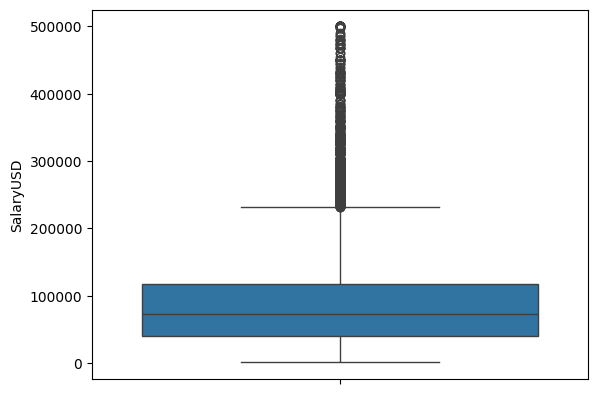

In [26]:
sns.boxplot(df['SalaryUSD'])

In [27]:
median_workexp = df['WorkExp'].median()
df['WorkExp'].fillna(median_workexp, inplace=True)
df['WorkExp'] = df['WorkExp'].astype(float)



C:\Users\User\AppData\Local\Temp\ipykernel_3004\2922622276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WorkExp'].fillna(median_workexp, inplace=True)


In [28]:
df['WorkExp'].isna().sum()

np.int64(0)

In [29]:
q1 = df['SalaryUSD'].quantile(0.25)
q3 = df['SalaryUSD'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr

df[df['SalaryUSD'] >= upper_whisker].shape

upper_whisker

np.float64(231953.75449999998)

In [30]:
df = df[df['SalaryUSD'] <= 250000]
df.shape

(31778, 231)

In [31]:
df.head()

,DevType,Country,SalaryUSD,YearsCodePro,EdLevel,RemoteWork,OrgSize,Employment,Age,WorkExp,...,Puppet,Terraform,Unity 3D,Unreal Engine,Visual Studio Solution,Vite,Webpack,Yarn,npm,pnpm
72,Data scientist or machine learning specialist,Pakistan,7171.5055,1,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time;Student, full-time;Indepen...",18-24 years old,3.0,...,0,0,0,0,0,0,0,0,0,0
374,Academic researcher,Austria,32698.8205,6,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time",25-34 years old,9.0,...,0,0,0,0,0,0,0,0,0,0
379,Data scientist or machine learning specialist,Turkey,99264.2765,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,20 to 99 employees,"Employed, full-time",35-44 years old,7.0,...,0,0,0,0,0,1,0,0,0,0
385,"Developer, back-end",France,58390.7509,17,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Just me - I am a freelancer, sole proprietor, ...","Independent contractor, freelancer, or self-em...",35-44 years old,9.0,...,0,0,0,0,0,0,0,0,0,0
389,Student,United States of America,110000.0000,7,Some college/university study without earning ...,Remote,10 to 19 employees,"Employed, full-time;Student, part-time",25-34 years old,8.0,...,0,0,0,0,0,1,1,0,1,0


In [32]:
def convert_years_code(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        val = val.strip()
        if 'Less than 1 year' in val:
            return 0.5
        elif 'More than 50 years' in val:
            return 50
        elif val.isdigit():
            return float(val)
        else:
            try:
                return float(val)
            except:
                return np.nan
    return val  # already float or int
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)


C:\Users\User\AppData\Local\Temp\ipykernel_3004\3415757656.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)


In [33]:
invalid = df[df['WorkExp'] < df['YearsCodePro']]
print(invalid.shape[0])  


5983


In [34]:
df.drop(['YearsCodePro'], inplace=True, axis = 1)

C:\Users\User\AppData\Local\Temp\ipykernel_3004\1737805884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['YearsCodePro'], inplace=True, axis = 1)


In [35]:
df.head()

,DevType,Country,SalaryUSD,EdLevel,RemoteWork,OrgSize,Employment,Age,WorkExp,MainBranch,...,Puppet,Terraform,Unity 3D,Unreal Engine,Visual Studio Solution,Vite,Webpack,Yarn,npm,pnpm
72,Data scientist or machine learning specialist,Pakistan,7171.5055,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time;Student, full-time;Indepen...",18-24 years old,3.0,I am a developer by profession,...,0,0,0,0,0,0,0,0,0,0
374,Academic researcher,Austria,32698.8205,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)",100 to 499 employees,"Employed, full-time",25-34 years old,9.0,"I am not primarily a developer, but I write co...",...,0,0,0,0,0,0,0,0,0,0
379,Data scientist or machine learning specialist,Turkey,99264.2765,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,20 to 99 employees,"Employed, full-time",35-44 years old,7.0,I am a developer by profession,...,0,0,0,0,0,1,0,0,0,0
385,"Developer, back-end",France,58390.7509,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Just me - I am a freelancer, sole proprietor, ...","Independent contractor, freelancer, or self-em...",35-44 years old,9.0,I am a developer by profession,...,0,0,0,0,0,0,0,0,0,0
389,Student,United States of America,110000.0000,Some college/university study without earning ...,Remote,10 to 19 employees,"Employed, full-time;Student, part-time",25-34 years old,8.0,I am a developer by profession,...,0,0,0,0,0,1,1,0,1,0


In [36]:
df.drop('OrgSize', axis=1, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_3004\2086398865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('OrgSize', axis=1, inplace=True)


In [37]:
df.shape

(31778, 229)

In [38]:
df

,DevType,Country,SalaryUSD,EdLevel,RemoteWork,Employment,Age,WorkExp,MainBranch,Ada,...,Puppet,Terraform,Unity 3D,Unreal Engine,Visual Studio Solution,Vite,Webpack,Yarn,npm,pnpm
72,Data scientist or machine learning specialist,Pakistan,7171.5055,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)","Employed, full-time;Student, full-time;Indepen...",18-24 years old,3.0,I am a developer by profession,0,...,0,0,0,0,0,0,0,0,0,0
374,Academic researcher,Austria,32698.8205,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)","Employed, full-time",25-34 years old,9.0,"I am not primarily a developer, but I write co...",0,...,0,0,0,0,0,0,0,0,0,0
379,Data scientist or machine learning specialist,Turkey,99264.2765,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Employed, full-time",35-44 years old,7.0,I am a developer by profession,0,...,0,0,0,0,0,1,0,0,0,0
385,"Developer, back-end",France,58390.7509,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Independent contractor, freelancer, or self-em...",35-44 years old,9.0,I am a developer by profession,0,...,0,0,0,0,0,0,0,0,0,0
389,Student,United States of America,110000.0000,Some college/university study without earning ...,Remote,"Employed, full-time;Student, part-time",25-34 years old,8.0,I am a developer by profession,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65396,"Developer, full-stack",Lithuania,42041.3407,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)","Employed, full-time;Independent contractor, fr...",18-24 years old,9.0,I am a developer by profession,0,...,0,0,0,0,0,0,0,0,0,0
65401,"Developer, full-stack",France,46712.6007,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)","Employed, full-time",25-34 years old,9.0,I am a developer by profession,0,...,0,0,0,0,0,0,0,0,1,0
65408,"Developer, full-stack",France,71236.7161,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","Employed, full-time",25-34 years old,9.0,I am a developer by profession,0,...,0,0,0,0,0,1,0,0,1,0
65412,"Developer, back-end",Italy,67733.2710,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,"Employed, full-time",35-44 years old,18.0,I am a developer by profession,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
count = 0
for i in df['EdLevel']:
    if i == 'Something else':
        count+=1
print(count)

294


In [40]:
df['SalaryUSD'] = df['SalaryUSD'].round(0).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_3004\2637895426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalaryUSD'] = df['SalaryUSD'].round(0).astype(int)


In [41]:
education_map = {
    'Primary/elementary school': 0,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
    'Some college/university study without earning a degree': 2,
    'Associate degree (A.A., A.S., etc.)': 3,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 5,
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6,
    'Something else': 0
}
df['EdLevelEncoded'] = df['EdLevel'].map(education_map)


C:\Users\User\AppData\Local\Temp\ipykernel_3004\2158620632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevelEncoded'] = df['EdLevel'].map(education_map)


In [42]:
age_map = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': np.nan  
}
df['AgeEncoded'] = df['Age'].map(age_map)


C:\Users\User\AppData\Local\Temp\ipykernel_3004\2744798507.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeEncoded'] = df['Age'].map(age_map)


In [46]:
le = LabelEncoder()
df['CountryEncoded'] = le.fit_transform(df['Country'])
with open('country_encoder.pkl','wb') as f:
    pickle.dump(le,f)

C:\Users\User\AppData\Local\Temp\ipykernel_3004\3652801658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryEncoded'] = le.fit_transform(df['Country'])


In [57]:
df_dummies = pd.get_dummies(df['DevType'], prefix='DevType')

df_dummies = df_dummies.astype(int)

df = pd.concat([df.drop(columns=['DevType']), df_dummies], axis=1)


In [58]:
df

,Country,SalaryUSD,EdLevel,RemoteWork,Employment,Age,WorkExp,MainBranch,Ada,Apex,...,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Product manager,DevType_Project manager,DevType_Research & Development role,DevType_Scientist,DevType_Security professional,"DevType_Senior Executive (C-Suite, VP, etc.)",DevType_Student,DevType_System administrator
72,Pakistan,7172,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)","Employed, full-time;Student, full-time;Indepen...",18-24 years old,3.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0
374,Austria,32699,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)","Employed, full-time",25-34 years old,9.0,"I am not primarily a developer, but I write co...",0,0,...,0,0,0,0,0,0,0,0,0,0
379,Turkey,99264,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Employed, full-time",35-44 years old,7.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0
385,France,58391,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Independent contractor, freelancer, or self-em...",35-44 years old,9.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0
389,United States of America,110000,Some college/university study without earning ...,Remote,"Employed, full-time;Student, part-time",25-34 years old,8.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65396,Lithuania,42041,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)","Employed, full-time;Independent contractor, fr...",18-24 years old,9.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0
65401,France,46713,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)","Employed, full-time",25-34 years old,9.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0
65408,France,71237,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","Employed, full-time",25-34 years old,9.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0
65412,Italy,67733,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,"Employed, full-time",35-44 years old,18.0,I am a developer by profession,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_dummies = pd.get_dummies(df['RemoteWork'],prefix=None).astype(int)
df = pd.concat([df.drop(columns=['RemoteWork']),df_dummies], axis = 1)

In [60]:
df['EmploymentList'] = df['Employment'].dropna().apply(lambda x: [item.strip() for item in x.split(';')])

mlb = MultiLabelBinarizer()
employment_dummies = pd.DataFrame(
    mlb.fit_transform(df['EmploymentList']),
    columns=mlb.classes_,
    index=df['EmploymentList'].index
)

df = pd.concat([df.drop(columns=['Employment', 'EmploymentList']), employment_dummies], axis=1)

In [61]:
df.head()

,Country,SalaryUSD,EdLevel,Age,WorkExp,MainBranch,Ada,Apex,Assembly,Bash/Shell (all shells),...,In-person,Remote,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
72,Pakistan,7172,"Secondary school (e.g. American high school, G...",18-24 years old,3.0,I am a developer by profession,0,0,1,1,...,0,0,1,1,1,0,0,0,1,0
374,Austria,32699,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",25-34 years old,9.0,"I am not primarily a developer, but I write co...",0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
379,Turkey,99264,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",35-44 years old,7.0,I am a developer by profession,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
385,France,58391,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",35-44 years old,9.0,I am a developer by profession,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
389,United States of America,110000,Some college/university study without earning ...,25-34 years old,8.0,I am a developer by profession,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [62]:
df.shape


(31778, 274)

In [63]:
final_data = df.drop(['Country','EdLevel','Age','MainBranch'],axis = 1)

In [64]:
final_data['LogSalary'] = np.log1p(final_data['SalaryUSD'])

In [65]:
final_data['WorkExp'] = np.log1p(final_data['WorkExp'])


In [66]:
np.log1p(7172)

np.float64(8.878079256126435)

In [67]:
final_data.head()

,SalaryUSD,WorkExp,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,...,Remote,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time",LogSalary
72,7172,1.386294,0,0,1,1,1,0,1,0,...,0,1,1,1,0,0,0,1,0,8.878079
374,32699,2.302585,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,10.395130
379,99264,2.079442,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,11.505548
385,58391,2.302585,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.974934
389,110000,2.197225,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,11.608245


In [68]:
final_data.columns.to_list()

['SalaryUSD',
 'WorkExp',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lisp',
 'Lua',
 'MATLAB',
 'MicroPython',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic (.Net)',
 'Zephyr',
 'Zig',
 'BigQuery',
 'Cassandra',
 'Clickhouse',
 'Cloud Firestore',
 'Cockroachdb',
 'Cosmos DB',
 'Couch DB',
 'Couchbase',
 'Databricks SQL',
 'Datomic',
 'DuckDB',
 'Dynamodb',
 'Elasticsearch',
 'EventStoreDB',
 'Firebase Realtime Database',
 'Firebird',
 'H2',
 'IBM DB2',
 'InfluxDB',
 'MariaDB',
 'Microsoft Access',
 'Microsoft SQL Server',
 'MongoDB',
 'MySQL',
 'Neo4J',
 'Oracle',
 'PostgreSQL',
 'Presto',
 'RavenDB',
 'Redis',
 '

In [69]:
X = final_data.drop(columns=['SalaryUSD', 'LogSalary'])
y = final_data['LogSalary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(X_train.dtypes.value_counts())
X_train.replace('NaN', np.nan, inplace=True)


int64      267
float64      2
Name: count, dtype: int64


In [71]:
for col in X_train.columns:
    if X_train[col].apply(lambda x: isinstance(x, (list, dict))).any():
        print(f"Problem in column: {col}")
X_train.columns = X_train.columns.str.strip()


In [72]:
final_data.shape

(31778, 271)

In [73]:
from xgboost import XGBRegressor

# Clean your features first
X_train = X_train.select_dtypes(include=['int64', 'float64']).copy()
X_test = X_test.select_dtypes(include=['int64', 'float64']).copy()

# Reset index to avoid hidden metadata issues
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Build and train the model
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Force NumPy arrays to avoid .dtype error
model.fit(X_train.values, y_train.values)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Predict log-salary
y_pred_log = model.predict(X_test.values)

# Step 2: Convert predictions back to original salary
y_pred_salary = np.expm1(y_pred_log)
y_true_salary = np.expm1(y_test)  # if y_test is in log-scale

# Step 3: Calculate metrics
rmse = np.sqrt(mean_squared_error(y_true_salary, y_pred_salary))
mae = mean_absolute_error(y_true_salary, y_pred_salary)
r2 = r2_score(y_true_salary, y_pred_salary)

# Step 4: Display the results
print(f"📊 RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"📊 MAE (Mean Absolute Error): {mae:,.2f}")
print(f"📈 R² Score: {r2:.4f}")


📊 RMSE (Root Mean Squared Error): 36,178.61
📊 MAE (Mean Absolute Error): 25,254.62
📈 R² Score: 0.5721


In [75]:
# # Save the trained model to a file
# with open('salary_model.pkl', 'wb') as f:
#     pickle.dump(model, f)
with open("features.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)


In [76]:
with open('salary_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make a test prediction
prediction = loaded_model.predict(X_test.values[:1])
print(prediction)
n_features = model.n_features_in_
print("Model input feature count:", n_features)


[9.189809]
Model input feature count: 269
